In [1]:

import numpy as np
import os
from pvae.our_test import our_test, load_model, get_predictions
from pvae.pplots import plot_embedding
%matplotlib inline

def construct_tensor(fpath):
    ansarr = np.loadtxt(fpath).reshape(-1)
    # quit()
    # ansarr = np.zeros((maxlen, 20))
    # ansarr[:arr.shape[0], :] = arr
    return np.array(ansarr)

def prepare_data(fpath, withroot = True, fmt='.aamtx'):
    # print([x[0] for x in os.walk(fpath)])
    # subfolders = [f.path for f in os.listdir(fpath) if f.is_dir() ]   
    # fmt = '.aamtx'
    proteins = sorted([int(s.strip(fmt)) for s in os.listdir(fpath) if fmt in s])
    proteins = [str(p)+fmt for p in proteins]

    n_proteins = len(proteins)
    print(f"{n_proteins-1} proteins found in folder {fpath}.")

    if not withroot:
        proteins.remove("0.aamtx")
        n_proteins = len(proteins)
        print("No root detected")

    protein_file = proteins[0]
    #print(protein_file)
    fin = f'{fpath}/{protein_file}'    

    a = construct_tensor(fin)
    print(a.shape)

    features = np.zeros([n_proteins, len(a)])
    labels = []
    print("Prepare data: tensor construction")
    for i, protein_name in enumerate(proteins):
        #print(i, protein_name)
        fin = f'{fpath}/{protein_name}'
        features[i, :] = construct_tensor(fin)
        labels.append(protein_name.split('.')[0])
    print("Prepare data: successfully terminated")
    return features, labels

In [2]:
import pandas as pd

In [3]:
family = 'globins'
family2 = 'globin'
folder = f'/Users/klanna/UniParis/PoincareMSA/examples/{family}/{family}_data/fasta0.9/'
features, labels = prepare_data(folder, withroot = False, fmt='.aamtx')

252 proteins found in folder /Users/klanna/UniParis/PoincareMSA/examples/globins/globins_data/fasta0.9/.
No root detected
(3060,)
Prepare data: tensor construction
Prepare data: successfully terminated


In [4]:
df = pd.DataFrame(features, columns=[f'msa{i}' for i in range(features.shape[1])])
df['proteins_id'] = labels

In [5]:
df.to_csv(f'./data/{family}.csv', header=False, index=False)

In [6]:
colors = pd.read_csv(f'/Users/klanna/UniParis/PoincareMSA/examples/{family}/{family2}_colors_new.csv')

In [7]:
df.to_csv(f'./data/{family}.csv', header=False, index=False)
colors.to_csv(f'./data/{family}_colours.csv', header=True, index=False)

In [9]:
model_name = '/Users/klanna/UniParis/pvae/experiments//globins/2023-02-03T10_41_35.829678bnc2t4fv/model.ckpt'
model2 = load_model(model_name)
model2

CSV(
  (enc): EncWrapped(
    (manifold): Poincare ball manifold
    (enc): Sequential(
      (0): Sequential(
        (0): Linear(in_features=3060, out_features=200, bias=True)
        (1): ReLU()
      )
    )
    (fc21): Linear(in_features=200, out_features=2, bias=True)
    (fc22): Linear(in_features=200, out_features=1, bias=True)
  )
  (dec): DecWrapped(
    (manifold): Poincare ball manifold
    (dec): Sequential(
      (0): Sequential(
        (0): Linear(in_features=2, out_features=200, bias=True)
        (1): ReLU()
      )
    )
    (fc31): Linear(in_features=200, out_features=3060, bias=True)
  )
  (manifold): Poincare ball manifold
)

In [10]:
model_name = '/Users/klanna/UniParis/pvae/experiments//globins/2023-02-03T10_42_17.999490m3z7vs5k/model.ckpt'
model = load_model(model_name)
# our_test(model_name, family)
model

CSV(
  (enc): EncWrapped(
    (manifold): Poincare ball manifold
    (enc): Sequential(
      (0): Sequential(
        (0): Linear(in_features=3060, out_features=200, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=200, out_features=200, bias=True)
        (1): ReLU()
      )
    )
    (fc21): Linear(in_features=200, out_features=2, bias=True)
    (fc22): Linear(in_features=200, out_features=1, bias=True)
  )
  (dec): DecWrapped(
    (manifold): Poincare ball manifold
    (dec): Sequential(
      (0): Sequential(
        (0): Linear(in_features=2, out_features=200, bias=True)
        (1): ReLU()
      )
      (1): Sequential(
        (0): Linear(in_features=200, out_features=200, bias=True)
        (1): ReLU()
      )
    )
    (fc31): Linear(in_features=200, out_features=3060, bias=True)
  )
  (manifold): Poincare ball manifold
)

In [11]:
preds = get_predictions(model, features)
preds2 = get_predictions(model2, features)

/Users/klanna/miniconda3/envs/ssl/lib/python3.10/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'pvae.distributions.hyperbolic_radius.HyperbolicRadius'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +
/Users/klanna/miniconda3/envs/ssl/lib/python3.10/site-packages/torch/distributions/distribution.py:44: UserWarning: <class 'pvae.distributions.hyperspherical_uniform.HypersphericalUniform'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  warnings.warn(f'{self.__class__} does not define `arg_constraints`. ' +
/Users/klanna/UniParis/pvae/pvae/distributions/hyperbolic_radius.py:247: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It cu

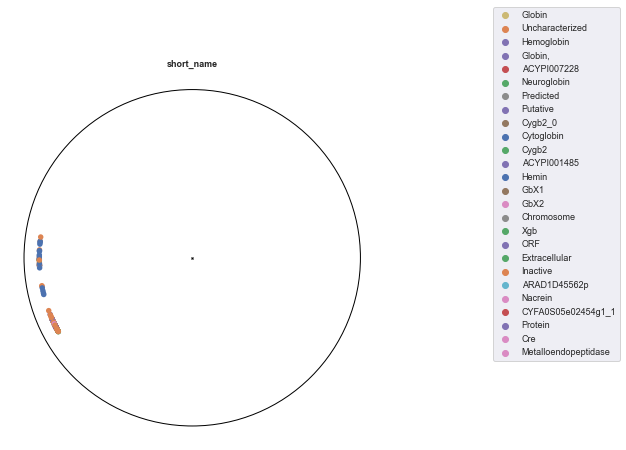

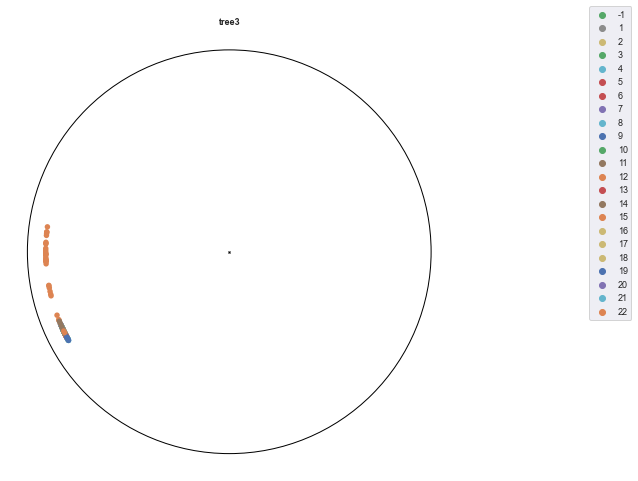

In [16]:
embeddings = preds[0].loc.numpy()
embeddings2 = preds[2][0].numpy()

for col in ['short_name', 'tree3']:
    plot_embedding(
            embeddings,
            labels=colors[col],
            labels_text=None,
            labels_idx=None,
            col_dict=None,
            title=col,
            show_lines=False,
            show_text=True,
            show_legend=True,
            axis_equal=True,
            circle_size=30,
            circe_transparency=1.0,
            line_transparency=0.8,
            line_width=0.8,
            fontsize=9,
            fig_width=10,
            fig_height=10,
            file_name=None,
            file_format=None,
            labels_name=None,
            width_ratios=[7, 1],
            bbox=(1.3, 0.7),
            plot_legend=True,
            is_hyperbolic=True
        )

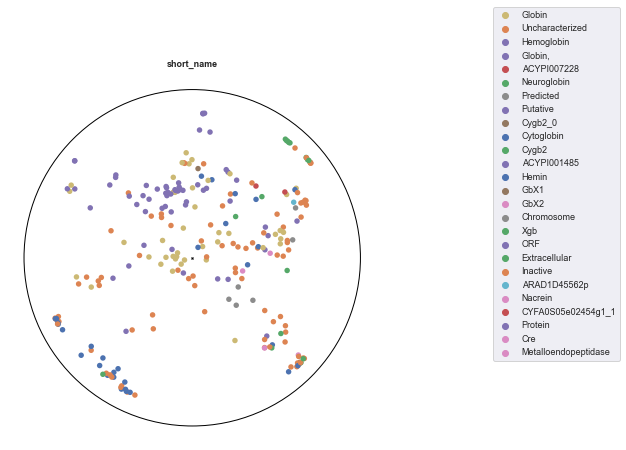

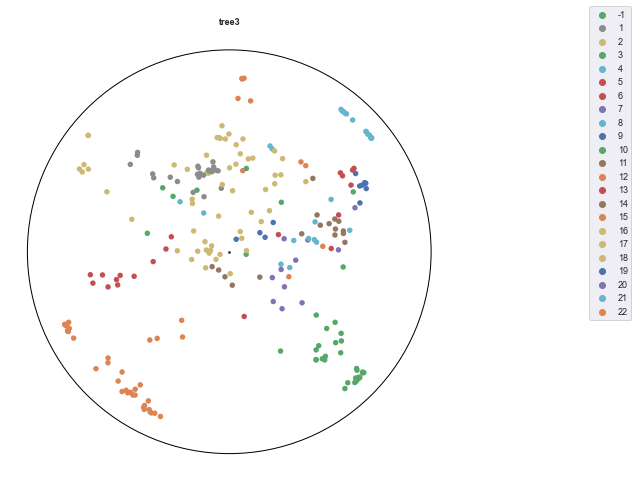

In [17]:
embeddings = preds2[0].loc.numpy()
embeddings2 = preds2[2][0].numpy()

for col in ['short_name', 'tree3']:
    plot_embedding(
            embeddings,
            labels=colors[col],
            labels_text=None,
            labels_idx=None,
            col_dict=None,
            title=col,
            show_lines=False,
            show_text=True,
            show_legend=True,
            axis_equal=True,
            circle_size=30,
            circe_transparency=1.0,
            line_transparency=0.8,
            line_width=0.8,
            fontsize=9,
            fig_width=10,
            fig_height=10,
            file_name=None,
            file_format=None,
            labels_name=None,
            width_ratios=[7, 1],
            bbox=(1.3, 0.7),
            plot_legend=True,
            is_hyperbolic=True
        )

In [23]:
print(preds[1].loc)
print(preds2[1].loc)

tensor([[[0.1192, 0.0486, 0.1456,  ..., 0.0543, 0.0816, 0.0415],
         [0.1189, 0.0482, 0.1378,  ..., 0.0543, 0.0815, 0.0420],
         [0.1189, 0.0482, 0.1376,  ..., 0.0543, 0.0815, 0.0421],
         ...,
         [0.1160, 0.0431, 0.0345,  ..., 0.0535, 0.0811, 0.0496],
         [0.1162, 0.0435, 0.0419,  ..., 0.0536, 0.0811, 0.0491],
         [0.1176, 0.0459, 0.0906,  ..., 0.0539, 0.0813, 0.0455]]])
tensor([[[0.1187, 0.0090, 0.1229,  ..., 0.0177, 0.0358, 0.0348],
         [0.0617, 0.0101, 0.0590,  ..., 0.0023, 0.0386, 0.0296],
         [0.0786, 0.0082, 0.0850,  ..., 0.0062, 0.0535, 0.0287],
         ...,
         [0.1219, 0.0047, 0.1077,  ..., 0.0259, 0.1906, 0.0338],
         [0.1155, 0.0056, 0.1259,  ..., 0.0179, 0.1794, 0.0323],
         [0.1292, 0.0056, 0.1534,  ..., 0.0161, 0.0595, 0.0365]]])


In [24]:
print(preds[1].scale)
print(preds2[1].scale)

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])


In [26]:
print(preds[0].scale)

tensor([[7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
        [7.],
      

In [27]:
print(preds2[0].scale)

tensor([[0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0.1000],
        [0

In [28]:
print(preds[0].loc)

tensor([[-8.2155e-01, -3.8953e-01],
        [-8.2525e-01, -3.8164e-01],
        [-8.1979e-01, -3.9321e-01],
        [-8.0540e-01, -4.2192e-01],
        [-8.1168e-01, -4.0971e-01],
        [-8.1084e-01, -4.1135e-01],
        [-8.1987e-01, -3.9306e-01],
        [-8.1561e-01, -4.0183e-01],
        [-8.2707e-01, -3.7767e-01],
        [-8.2351e-01, -3.8537e-01],
        [-8.1742e-01, -3.9812e-01],
        [-8.1731e-01, -3.9834e-01],
        [-8.2320e-01, -3.8603e-01],
        [-8.0846e-01, -4.1602e-01],
        [-8.2395e-01, -3.8443e-01],
        [-8.1106e-01, -4.1092e-01],
        [-7.9590e-01, -4.3957e-01],
        [-8.0663e-01, -4.1955e-01],
        [-8.1481e-01, -4.0344e-01],
        [-8.1022e-01, -4.1258e-01],
        [-8.3116e-01, -3.6858e-01],
        [-8.1581e-01, -4.0141e-01],
        [-8.1713e-01, -3.9873e-01],
        [-8.1522e-01, -4.0260e-01],
        [-8.3274e-01, -3.6500e-01],
        [-8.1778e-01, -3.9738e-01],
        [-8.1957e-01, -3.9369e-01],
        [-8.1522e-01, -4.026

In [29]:
print(preds2[0].loc)

tensor([[ 0.0838, -0.0126],
        [-0.0360,  0.6243],
        [ 0.1093,  0.1954],
        [ 0.2274,  0.3791],
        [ 0.1801,  0.3083],
        [ 0.2252,  0.3370],
        [-0.2076,  0.4083],
        [-0.1019,  0.3892],
        [ 0.0050, -0.1087],
        [ 0.0856,  0.0054],
        [-0.0189,  0.5586],
        [ 0.0679,  0.5587],
        [ 0.0543,  0.1001],
        [ 0.3789,  0.4265],
        [ 0.5417,  0.1824],
        [ 0.5045,  0.2593],
        [ 0.5747,  0.6854],
        [ 0.5971,  0.1064],
        [ 0.5053,  0.0160],
        [ 0.5426,  0.1512],
        [ 0.0740, -0.3205],
        [-0.0016,  0.5832],
        [ 0.0327,  0.4339],
        [ 0.0017,  0.4157],
        [ 0.2572, -0.0879],
        [ 0.0346,  0.5301],
        [ 0.1169,  0.4639],
        [-0.1126,  0.4784],
        [-0.0442,  0.5614],
        [ 0.0547,  0.4851],
        [ 0.0162,  0.3023],
        [-0.1835,  0.2606],
        [ 0.2556,  0.3811],
        [-0.1264,  0.1919],
        [ 0.2020,  0.5239],
        [ 0.2130,  0